In [1]:
import torch
from cpclasses import *

In [2]:
data_flat = np.loadtxt('labeled_clusters_1000.txt')
positions_from_file = data_flat[:,:24].reshape(-1,12,2)
energies_from_file = data_flat[:,24:25].reshape(-1)
labels_from_file = data_flat[:,-1:].reshape(-1).astype('int')

In [3]:
positions_from_file[:1],energies_from_file[:1],labels_from_file[:1]

(array([[[4.721805, 4.275757],
         [4.99196 , 2.669204],
         [4.631578, 5.889142],
         [4.373125, 7.554287],
         [5.004835, 6.797513],
         [5.602687, 6.016059],
         [6.18045 , 5.206921],
         [5.71127 , 4.300034],
         [5.206776, 5.119051],
         [6.353148, 3.567599],
         [4.010138, 6.635914],
         [3.676022, 5.698195]]]),
 array([-27.092445]),
 array([5]))

In [4]:
for label in np.unique(labels_from_file):
    print(label, len(labels_from_file[labels_from_file==label]))


0 48
1 69
2 127
3 123
4 158
5 108
6 103
7 79
8 59
9 126


[Text(0.5, 0, 'Energy'),
 Text(0, 0.5, 'Abundance'),
 Text(0.5, 1.0, 'Energy distribution of clusters')]

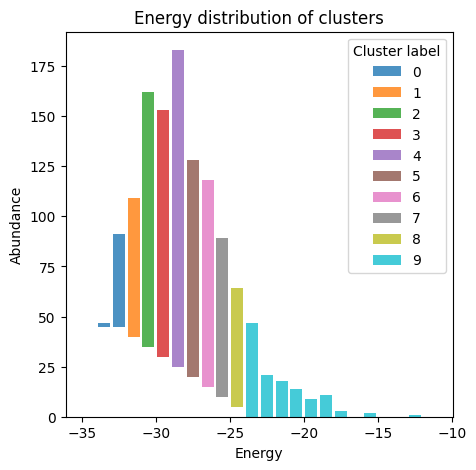

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

bins = range(35)

for label in np.unique(labels_from_file):
    bins = range(-35,-10)
    bars, _ = np.histogram(energies_from_file[labels_from_file==label],bins=bins)
    bottom = (9-label)*5
    ax.bar(np.array(list(bins))[:-1]+0.5,bars,bottom=bottom,alpha=0.8,label=f'{label}')

ax.legend(title='Cluster label')
ax.set(xlabel='Energy',ylabel='Abundance', title='Energy distribution of clusters')



In [40]:
class LJGSystem():

    def __init__(self,positions,energies,labels):
        self.positions = positions
        self.energies = energies
        self.labels = labels

#
    def moments(self):
        beta = 3    
        cm = np.mean(self.positions, axis=0)
        mu2 = beta**(-1) * np.sum((self.positions - cm)**2)
        mu4 = beta**(-2) * np.sum(((self.positions - cm)**2)**2)
        mu6 = beta**(-3) * np.sum(((self.positions - cm)**2)**3)
        mu8 = beta**(-4) * np.sum(((self.positions - cm)**2)**4)
        

        return np.array([mu2, mu4, mu6, mu8]).flatten()


    def draw(self, ax):

        ax.scatter(self.positions[:,0],self.positions[:,1])
        

In [42]:
i = 3
print(positions_from_file[i])
print(energies_from_file[i])
print(labels_from_file[i])
ljg = LJGSystem(positions_from_file[i],energies_from_file[i],labels_from_file[i])


[[5.621346 2.285205]
 [4.700431 6.660315]
 [3.859736 6.132318]
 [4.764785 3.736503]
 [4.741416 5.677128]
 [5.623889 5.219098]
 [5.576166 6.198768]
 [5.640562 4.241399]
 [5.650794 3.269248]
 [3.919137 5.156834]
 [3.191191 4.507414]
 [4.785578 4.710761]]
-28.917112
4
